In [48]:
# coding:utf-8
import numpy as np
import random
"""
MAZE = [[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1],
        [-1, 0, 0, 0, 0, 0, 0, 0, 0,-1],
        [-1,-1,-1,-1,-1, 0,-1,-1, 0,-1],
        [-1,-1, 0, 0, 0, 0, 0,-1, 0,-1],
        [-1, 0,-1,-1,-1,-1,-1,-1, 0,-1],
        [-1, 0, 0, 0, 0, 0, 0, 0, 0,-1],
        [-1, 0,-1,-1,-1,-1,-1,-1, 0,-1],
        [-1, 0, 0, 0, 0, 0, 0, 0, 0,-1],
        [-1,-1, 0,-1,-1,-1,-1,-1,-1,-1],
        [-1,-1, 0, 0, 0, 0, 0, 0, 0,-1],
        [-1,-1,-1,-1, 0,-1,-1,-1,-1,-1],
        [-1,-1, 0, 0, 0, 0, 0, 0, 1,-1],
        [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]]
"""
MAZE = [[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1],
        [-1, 0, 0, 0, 0, 0, 0, 0, 0,-1, 0,-1],
        [-1,-1,-1,-1,-1, 0,-1,-1, 0,-1,-1,-1],
        [-1,-1, 0, 0, 0, 0, 0,-1, 0,-1,-1,-1],
        [-1, 0,-1,-1,-1,-1,-1,-1, 0,-1,-1,-1],
        [-1, 0, 0, 0, 0, 0, 0, 0 ,0,-1,-1,-1],
        [-1, 0,-1,-1,-1,-1,-1,-1, 0,-1,-1,-1],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0,-1,-1,-1],
        [ 0,-1, 0,-1,-1,-1,-1,-1,-1,-1,-1,-1],
        [ 0,-1, 0, 0, 0, 0, 0, 0, 0,-1,-1,-1],
        [ 0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1],
        [ 0,-1, 0, 0, 0, 0,-1, 0, 0, 0, 1,-1],
        [ 0, 0, 0,-1,-1, 0, 0, 0,-1,-1,-1,-1]]
START  = (1, 1)
ACTION = [(-1, 0), (1, 0), (0, -1), (0, 1)] # [上, 下, 左, 右]
EPOCH  = 50000
ALPH   = 0.1
EPSIL  = 0.01
RESULT = []
FINISH = []

def q_learn(qtable, qtable_index):
    f = open("/Users/chan-p/Desktop/action.txt", "w")
    record = []
    for epoch in range(EPOCH):
        # if epoch > EPOCH/2: 
        #     EPSIL = EPSIL/(epoch/2)
        state  = START
        f.write(str(0) + "," + str(0) + "," +str(3) + "\n")
        while True:
            now_action = policy_egreedy(qtable_index[state], qtable)
            next_state = (state[0] + now_action[0], state[1] + now_action[1])
            if state_check(next_state) == 0 or MAZE[next_state[0]][next_state[1]] == -1:
                qtable = update_value(qtable_index[(state)], None, ACTION.index(now_action), -1, qtable, 0)
                f.write(str(now_action[0]) + "," + str(now_action[1]) + "," +str(1) + "\n")
                record.append((state, now_action, -1, 1))
                RESULT.append(0)
                break
            reword = MAZE[next_state[0]][next_state[1]]
            qtable = update_value(qtable_index[(state)], qtable_index[next_state], ACTION.index(now_action), reword, qtable, 1)
            record.append((state, now_action, reword, 0))
            state = next_state
            if reword == 1:
                f.write(str(0) + "," + str(0) + "," +str(2) + "\n")
                RESULT.append(1)
                record.append((state, now_action, reword, 1))
                break
            f.write(str(now_action[0]) + "," + str(now_action[1]) + "," +str(0) + "\n")
    f.close()
    return RESULT, record
            
def update_value(state, next_state, now_action, reword, qtable , flg):
    if flg == 0:
        qtable[state][now_action] = (1 - ALPH) * qtable[state][now_action] + ALPH * reword
        return qtable
    next_action = ACTION[np.argmax(qtable[next_state])]
    qtable[state][now_action] = (1 - ALPH) * qtable[state][now_action] + ALPH * (reword + qtable[next_state][ACTION.index(next_action)])
    return qtable
    
def policy_greedy(state, qtable):
    return ACTION[np.argmax(np.array(qtable[state]))]

def policy_egreedy(state, qtable):
    return ACTION[random.choice([i for i, x in enumerate(qtable[state]) if x == max(qtable[state])])] if EPSIL < random.random() else random.choice(ACTION)
            
def action_value(state, action, qtable):
    return qtable[state][action]

def output_action(now_action):
    if now_action == (-1, 0):
        print("↑", end="")
    elif now_action == (1, 0):
        print("↓", end="")
    elif now_action == (0, -1):
        print("←", end="")
    elif now_action == (0, 1):
        print("→", end="")
        
def state_check(state):
    if (state[0] < 0) or (state[1] < 0) or (len(MAZE)-1) < state[0] or (len(MAZE[0])-1 < state[1]) :
        # print("失敗")
        RESULT.append(0)
        return 0
    return 1

def init_qtable():
    qtable_index = {}
    num = 0
    for y in range(len(MAZE)+1):
        for x in range(len(MAZE[0])+1):
            qtable_index[(y, x)] = num
            num += 1
    return np.zeros(((len(MAZE[0])+1)*(len(MAZE)+1), 4)), qtable_index

def main():
    qtable, qtable_index = init_qtable()
    return q_learn(qtable, qtable_index)

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def gragh(result, epoch):    
    x = np.arange(0, epoch, 1)
    left = np.array(x)
    count = 0
    count_1 = 0
    parcent = []
    for i in result:
        count += 1
        if i == 1:
            count_1 += 1
        parcent.append(count_1/count)
    height = np.array(parcent)
    plt.plot(left, height)

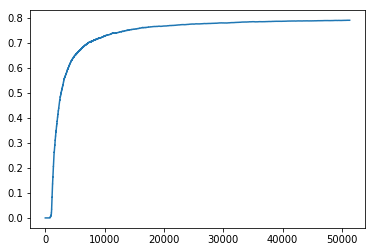

In [49]:
_list, record = main()
gragh(_list, len(_list))
count = 1
write_count = 0
with open("./record.csv", "w") as f:
    for line in record:
        if count % 15 == 0:
            f.write(str(line[0][0]) + "," + str(line[0][1]) + "," +str(line[1][0]) + "," + str(line[1][1]) + "," + str(line[2]) + "," + str(line[3]) + "\n")
            write_count += 1
        if write_count == 5000:
            break
        count += 1

In [185]:
"""
MAZE = [[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1],
        [-1, 0, 0, 0, 0, 0, 0, 0, 0,-1],
        [-1,-1,-1,-1,-1, 0,-1,-1, 0,-1],
        [-1,-1, 0, 0, 0, 0, 0,-1, 0,-1],
        [-1, 0,-1,-1,-1,-1,-1,-1, 0,-1],
        [-1, 0, 0, 0, 0, 0, 0, 0, 0,-1],
        [-1, 0,-1,-1,-1,-1,-1,-1, 0,-1],
        [-1, 0, 0, 0, 0, 0, 0, 0, 0,-1],
        [-1,-1, 0,-1,-1,-1,-1,-1,-9,-1],
        [-1,-1, 0, 0, 0, 0, 0, 0, 1,-1],
        [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]]
"""

'\nMAZE = [[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1],\n        [-1, 0, 0, 0, 0, 0, 0, 0, 0,-1],\n        [-1,-1,-1,-1,-1, 0,-1,-1, 0,-1],\n        [-1,-1, 0, 0, 0, 0, 0,-1, 0,-1],\n        [-1, 0,-1,-1,-1,-1,-1,-1, 0,-1],\n        [-1, 0, 0, 0, 0, 0, 0, 0, 0,-1],\n        [-1, 0,-1,-1,-1,-1,-1,-1, 0,-1],\n        [-1, 0, 0, 0, 0, 0, 0, 0, 0,-1],\n        [-1,-1, 0,-1,-1,-1,-1,-1,-9,-1],\n        [-1,-1, 0, 0, 0, 0, 0, 0, 1,-1],\n        [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]]\n'